## **Notebook 04 — Classifier (Logistic Regression)**
________
### ***1. Introduction***
### ***In this notebook, we implement a Logistic Regression model as a baseline classifier for predicting purchase intention.***
### ***This model will later be compared with the Random Forest classifier in the final report.***
________
### ***2. Importing Required Libraries***
### ***We import the necessary libraries for:***
- ***Data loading***

- ***Preprocessing***

- ***Model training***

- ***Evaluation metrics***

- ***ROC/AUC analysis***

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_curve, auc, confusion_matrix)

________
### ***3. Loading Datasets***
### ***We load:***
- ***Model_DF.csv (cleaned dataset)***

- ***Scaled_DF.csv (scaled for modeling)***
### ***These contain the final feature set and target variable.***

In [24]:
model_df = pd.read_csv("Model_DF.csv", index_col=0)
model_df.head(10)

,Recency,Frequency,Monetary,Cluster,Target,Cluster_KMeans4
CustomerID,,,,,,
12346.0,326,1,77183.60,1,0,3
12347.0,2,7,4310.00,0,1,0
12348.0,75,4,1797.24,0,1,0
12349.0,19,1,1757.55,0,1,0
12350.0,310,1,334.40,1,0,1
12352.0,36,8,2506.04,0,1,0
12353.0,204,1,89.00,1,0,1
12354.0,232,1,1079.40,1,0,1
12355.0,214,1,459.40,1,0,1


In [25]:
scaled_df = pd.read_csv("Scaled_DF.csv", index_col=0)
scaled_df.head(10)

,Recency,Frequency,Monetary,Cluster,Target
CustomerID,,,,,
12346.0,2.334574,-0.425097,8.358668,1,0
12347.0,-0.905340,0.354417,0.250966,0,1
12348.0,-0.175360,-0.035340,-0.028596,0,1
12349.0,-0.735345,-0.425097,-0.033012,0,1
12350.0,2.174578,-0.425097,-0.191347,1,0
12352.0,-0.565349,0.484336,0.050263,0,1
12353.0,1.114606,-0.425097,-0.218650,1,0
12354.0,1.394599,-0.425097,-0.108461,1,0
12355.0,1.214604,-0.425097,-0.177440,1,0


________
### ***4. Feature Definition and Train-Test Split***
### ***We define:***
### ***A. Features:***
- ***Recency***

- ***Frequency***

- ***Monetary***

- ***Cluster***
### ***B. Target:***
- ***Purchase intention (`Target`)***
### ***We split the data into 70% training and 30% testing while keeping the class distribution balanced using `stratify=y`.***

In [26]:
X = scaled_df[["Recency", "Frequency", "Monetary", "Cluster"]]
y = scaled_df["Target"]

________
### ***5. Model Definition and Training***
### ***We create a Logistic Regression model with:***
- ***`class_weight = "balanced"`***

- ***`random_state = 42`***
### ***Then train the model on the training data.***

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [28]:
X_train.shape, X_test.shape

((3036, 4), (1302, 4))

In [29]:
log_reg = LogisticRegression(class_weight="balanced", random_state=42)

In [30]:
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


________
### ***6. Predictions***
### ***We generate:***
- ***Class predictions (`y_pred`)***

- ***Predicted probabilities (required for ROC/AUC)***

In [31]:
y_pred_lr = log_reg.predict(X_test)

________
### ***7. Evaluation Metrics***
### ***We calculate performance metrics:***
- ***Accuracy***

- ***Precision***

- ***Recall***

- ***F1-score***

- ***Confusion Matrix***
### ***These results will later be compared with Random Forest performance.***

In [32]:
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

print(f"accuracy: {accuracy:.3f} \nprecision: {precision:.3f} \nrecall: {recall:.3f} \nf1: {f1:.3f}")

accuracy: 0.998 
precision: 1.000 
recall: 0.997 
f1: 0.998


In [33]:
cm = confusion_matrix(y_test, y_pred_lr)
cm

array([[435,   0],
       [  3, 864]])

________
### ***8. ROC Curve and AUC Score***
### ***We compute:***
- ***False Positive Rate (FPR)***

- ***True Positive Rate (TPR)***

- ***ROC Curve***

- ***AUC Score***
### ***This metric is especially important for evaluating classification quality on imbalanced datasets.***

In [34]:
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

roc_auc

1.0

________
### ***9. Heatmap of Confusion Matrix***

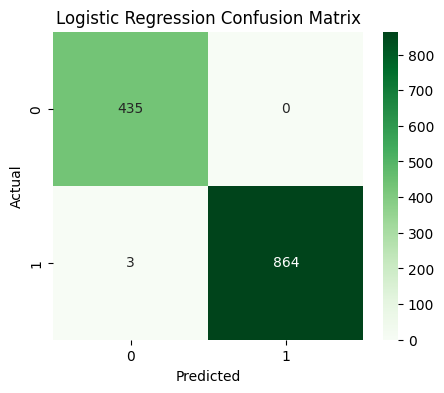

In [35]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

________
### ***10. Saving the Model***
### ***Finally, we save the trained Logistic Regression model as a `.pkl` file for later use in the comparison and final report.***

In [36]:
with open("logreg_model.pkl", "wb") as f: pickle.dump(log_reg,f)